### **Importing Libraries**

In [62]:
#basic imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#for modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score,roc_curve,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold


In [33]:
df=pd.read_csv('data/cleaned_startup_data.csv')

In [34]:
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,has_RoundABCD,has_Investor,has_Seed,invalid_startup,tier_relationships
0,1.178440,1.386969,1.734925,2.041753,3,12.834684,3,1,0,0,...,1,2007,0.0,0.0,0.0,0,1,1,0,4
1,1.812542,2.397650,2.080129,2.080129,4,17.506887,1,1,0,0,...,1,2000,0.0,0.0,0.0,1,1,0,0,3
2,0.709463,0.709463,0.899145,1.164868,1,14.771022,2,1,0,0,...,18,2009,0.0,0.0,0.0,1,0,0,0,4
3,1.418641,1.842944,1.946296,1.946296,3,17.504390,1,1,0,0,...,1,2002,0.0,0.0,0.0,1,0,0,0,4
4,0.000000,0.981517,0.037681,0.037681,2,14.077876,1,1,0,0,...,1,2010,10.0,1.0,2012.0,0,1,1,0,4


#### **Splitting Features and Target Variable**

In [35]:
X=df.drop('status',axis=1)
y=df['status']

In [36]:
X.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,founded_at_day,founded_at_year,closed_at_month,closed_at_day,closed_at_year,has_RoundABCD,has_Investor,has_Seed,invalid_startup,tier_relationships
0,1.178440,1.386969,1.734925,2.041753,3,12.834684,3,1,0,0,...,1,2007,0.0,0.0,0.0,0,1,1,0,4
1,1.812542,2.397650,2.080129,2.080129,4,17.506887,1,1,0,0,...,1,2000,0.0,0.0,0.0,1,1,0,0,3
2,0.709463,0.709463,0.899145,1.164868,1,14.771022,2,1,0,0,...,18,2009,0.0,0.0,0.0,1,0,0,0,4
3,1.418641,1.842944,1.946296,1.946296,3,17.504390,1,1,0,0,...,1,2002,0.0,0.0,0.0,1,0,0,0,4
4,0.000000,0.981517,0.037681,0.037681,2,14.077876,1,1,0,0,...,1,2010,10.0,1.0,2012.0,0,1,1,0,4


#### **Separating dataset into Train and Test** 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


##### Printing the shapes

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((672, 41), (168, 41), (672,), (168,))

### **Model Training and Evaluation: Regression Model Comparison**


In [45]:
models={
    "Logistic Regression" : LogisticRegression(), 
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Random Forest Classifier " : RandomForestClassifier(),
    "Adaboost Classifier" : AdaBoostClassifier(),
    "CatBoost Classifier" : CatBoostClassifier(verbose=0),
    "Xgboost Classifier" : XGBClassifier(),
    "Gradient Boosting Classifier" : GradientBoostingClassifier()

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # metrics for training
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)

    # metrics for testing
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc = roc_auc_score(y_test, y_test_pred)

    # print results
    print(list(models.keys())[i])

    print("Model performance for Training set ")
    print("Accuracy: {:.4f}".format(model_train_accuracy))
    print("F1 Score: {:.4f}".format(model_train_f1))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("ROC AUC: {:.4f}".format(model_train_roc_auc))
    print("-----------------------------------")


    print(' Model Performance for Test Set:')
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("F1 Score: {:.4f}".format(model_test_f1))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("ROC AUC: {:.4f}".format(model_test_roc_auc))
    print("="*35)
    print('\n')



Logistic Regression
Model performance for Training set 
Accuracy: 0.9911
F1 Score: 0.9911
Precision: 1.0000
Recall: 0.9861
ROC AUC: 0.9931
-----------------------------------
 Model Performance for Test Set:
Accuracy: 0.9881
F1 Score: 0.9882
Precision: 1.0000
Recall: 0.9832
ROC AUC: 0.9916


Decision Tree Classifier
Model performance for Training set 
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC: 1.0000
-----------------------------------
 Model Performance for Test Set:
Accuracy: 0.9702
F1 Score: 0.9701
Precision: 0.9750
Recall: 0.9832
ROC AUC: 0.9610


Random Forest Classifier 
Model performance for Training set 
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC: 1.0000
-----------------------------------
 Model Performance for Test Set:
Accuracy: 0.9881
F1 Score: 0.9882
Precision: 1.0000
Recall: 0.9832
ROC AUC: 0.9916


Adaboost Classifier
Model performance for Training set 
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Re

### **Model Performance Comparison Across Multiple Metrics**

In [ ]:
import pandas as pd

results = []

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_test_pred

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred, average='weighted'),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })


In [47]:
df_results = pd.DataFrame(results)

# Converting to long format for Seaborn
df_long = pd.melt(df_results, id_vars='Model', 
                  var_name='Metric', value_name='Score')


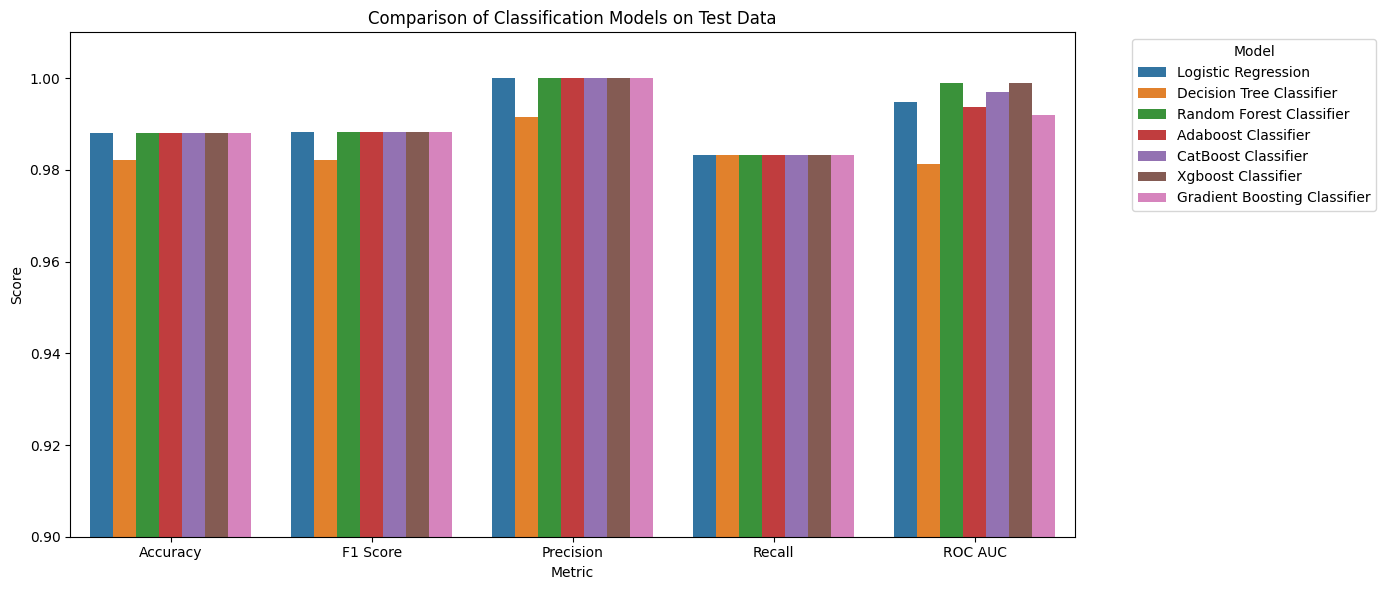

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=df_long, x='Metric', y='Score', hue='Model', palette='tab10')
plt.title('Comparison of Classification Models on Test Data')
plt.ylim(0.9, 1.01)  # Adjust depending on your score range
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Selecting XGBoost Classifier as the final model due to its consistent and high performance across all evaluation metrics including Accuracy, Precision, Recall, F1 Score, and ROC AUC**

### **Hyperparameter Tuning**

##### Param Grid :

In [53]:
xgboost_params={
    'learning_rate' :[0,1,0,0.01],
    'max_depth' : [5,8,12,20,30],
    'colsample_bytree' : [0.5,0.8,1.0,0.3,0.4],
    'n_estimators' : [100,200,300]
}

In [54]:
xgboost_params

{'learning_rate': [0, 1, 0, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'colsample_bytree': [0.5, 0.8, 1.0, 0.3, 0.4],
 'n_estimators': [100, 200, 300]}

In [56]:
xgb=XGBClassifier()
xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [58]:


grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgboost_params,
    scoring='f1',          
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model=grid_search.best_params_
print(f"-----------------Best Params for 'XgBoostClassifier' are :-----------------")  
print(best_model)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
-----------------Best Params for 'XgBoostClassifier' are :-----------------
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


In [59]:
xgb= XGBClassifier(colsample_bytree= 0.5, learning_rate=0.01, max_depth= 5, n_estimators= 100)
xgb.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Testing metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print results
print("XGBoost Classifier Performance:")
print("Training Set:")
print(f" Accuracy: {train_accuracy:.4f}")
print(f" F1 Score: {train_f1:.4f}")
print(f" ROC AUC Score: {train_roc_auc:.4f}")
print("-----------------------------------")
print("Test Set:")
print(f" Accuracy: {test_accuracy:.4f}")
print(f" F1 Score: {test_f1:.4f}")
print(f" ROC AUC Score: {test_roc_auc:.4f}")

XGBoost Classifier Performance:
Training Set:
 Accuracy: 1.0000
 F1 Score: 1.0000
 ROC AUC Score: 1.0000
-----------------------------------
Test Set:
 Accuracy: 0.9881
 F1 Score: 0.9882
 ROC AUC Score: 0.9916


#### **Plotting Roc-auc curve**

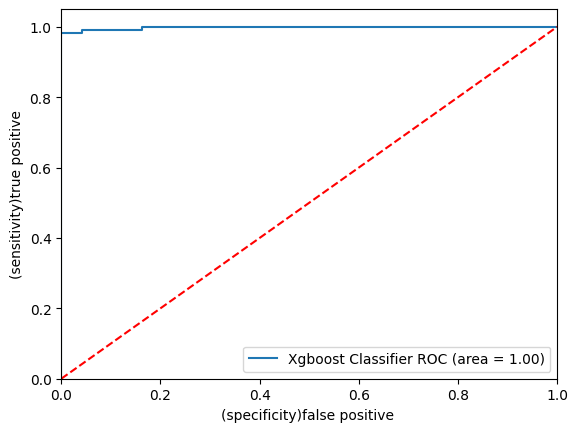

In [60]:

plt.figure()

auc_models=[
    {
    'label' :'Xgboost Classifier',
    'model' :XGBClassifier(colsample_bytree= 0.5, learning_rate=0.01, max_depth= 5, n_estimators= 100),
    'auc' : 0.8882
},
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    auc = roc_auc_score(y_test, y_prob) 
    
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc))



plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("(specificity)false positive ")
plt.ylabel("(sensitivity)true positive")
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

#### **Model Evaluation Metrics and Validation**
* Evaluating the model using key metrics (AUC, confusion matrix)
* Verifying model generalization and stability through cross-validation

Train AUC: 0.9984
Test AUC : 0.9983


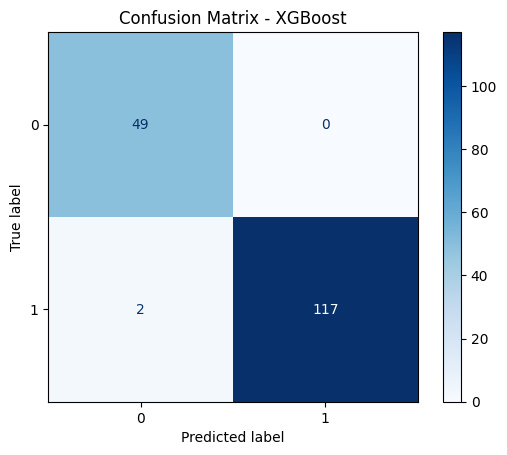

Cross-Validation AUC Scores: [1.         0.99808429 1.         0.99515504 0.98875031]
Mean CV AUC: 0.9964 ± 0.0042


In [ ]:

# Initialize model
xgb = XGBClassifier(colsample_bytree= 0.5, learning_rate=0.01, max_depth= 5, n_estimators= 100)
xgb.fit(X_train, y_train)

# Check AUC (Train vs Test)
train_auc = roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC : {test_auc:.4f}")

# Confusion Matrix
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()

# Cross-validation (ROC AUC for stability)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='roc_auc')

print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean CV AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
